In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# Question 1

In [2]:
# load data
df = pd.read_csv('https://datahub.io/machine-learning/mushroom/r/mushroom.csv')
df.rename(columns={'bruises%3F':'bruises'}, inplace=True)
df = df.apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [3]:
# replace null values with 'unknown' category
df['stalk-root'] = df['stalk-root'].cat.add_categories("Unknown").fillna("Unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                8124 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [4]:
# scale features
from sklearn.preprocessing import StandardScaler
features = df.copy()
# print(features.info())
y = features.pop('class')
y = y.astype('category').cat.codes
print(y.describe)
X_dummies = pd.get_dummies(features, prefix=features.columns)
print(X_dummies.describe())
print(X_dummies.info())
# y = df['class'].astype('category').cat.codes
scaled_features = StandardScaler().fit_transform(X_dummies)

<bound method NDFrame.describe of 0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int8>
       cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.055638     0.000492     0.387986     0.101920     0.003939   
std       0.229235     0.022185     0.487321     0.302562     0.062641   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  \
count  8124.000000    8124.000000    8124.000000    8124.000000   
mean      0.450025       0.2

In [5]:
# perform PCA and output components
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(scaled_features)
reduced = pca.transform(scaled_features)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int8


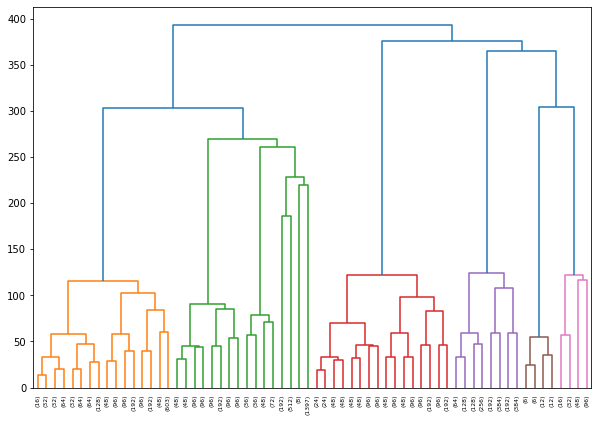

In [6]:
# construct and visualize data hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
y = df['class'].astype('category').cat.codes
print(y)
linked = linkage(reduced, 'ward')

labelList = y.unique()

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=y.values,
            distance_sort='descending',
            show_leaf_counts=True,
            p = 5,
            truncate_mode='level')
plt.show()

In [7]:
from sklearn.cluster import KMeans
k_mean_model = KMeans(n_clusters=7)
k_mean_model.fit(reduced)
y_kmeans = k_mean_model.labels_

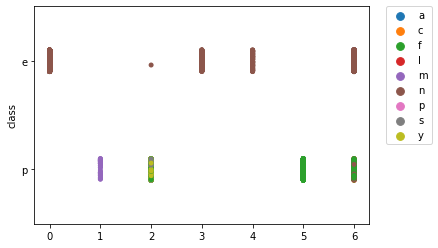

In [8]:
sns.stripplot(x=y_kmeans,y=df['class'], hue=df['odor'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

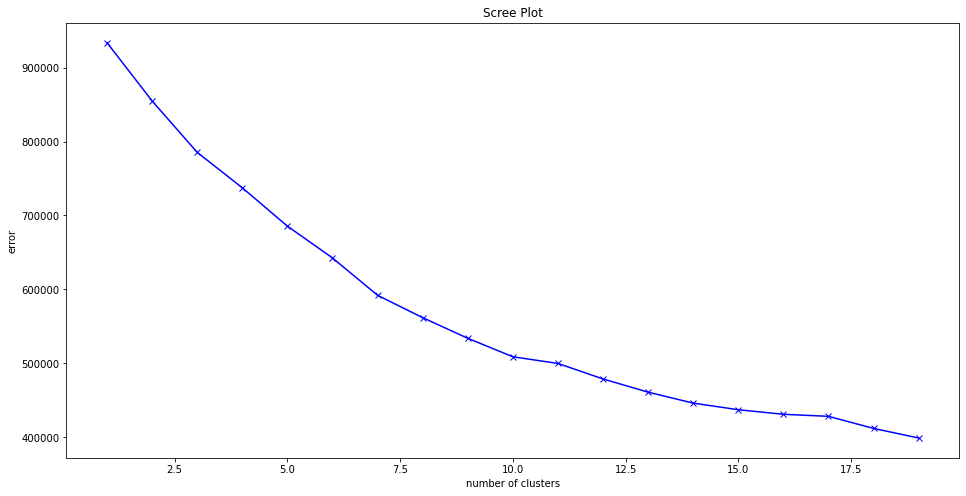

In [9]:
# determine best number of clusters for KMeans Clustering via scree plot
from sklearn.cluster import KMeans
error = []
num_cluster_range = range(1,20)
for num_cluster in num_cluster_range:
    k_mean_model = KMeans(n_clusters=num_cluster)
    k_mean_model.fit(reduced)
    error.append(k_mean_model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(num_cluster_range, error, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.title('Scree Plot')
plt.show()

In [10]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 20), error, curve="convex", direction="decreasing")
kl.elbow

8

In [11]:
k_mean_model = KMeans(n_clusters=8)
k_mean_model.fit(reduced)
y_kmeans = k_mean_model.labels_
X_dummies['cluster_label'] = y_kmeans
print(df.describe())

       cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count       8124        8124      8124    8124  8124            8124   
unique         6           4        10       2     9               2   
top            x           y         n       f     n               f   
freq        3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top               c         b          b           t  ...   
freq           6812      5612       1728        4608  ...   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     

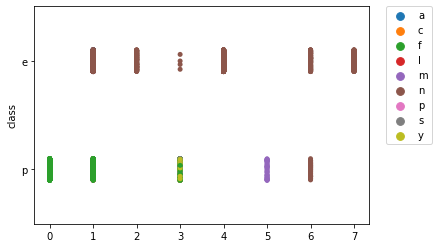

In [12]:
sns.stripplot(x=y_kmeans,y=df['class'], hue=df['odor'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_dummies, y_kmeans)
lr_pred_1 = lr.predict(X_dummies)
score = lr.score(X_dummies, y_kmeans)
print(score)

1.0


In [14]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter = 10000)
c_values = np.logspace(-10,0)
param_grid = {'C': c_values}
fin_gs = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score=0, verbose=1)
fin_gs.fit(X_dummies, y_kmeans)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(max_iter=10000),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 1.59985872e-10, 2.55954792e-10, 4.09491506e-10,
       6.55128557e-10, 1.04811313e-09, 1.67683294e-09, 2.68269580e-09,
       4.29193426e-09, 6.86648845e-09, 1.09854114e-08, 1.75751062e-08,
       2.81176870e-08, 4.49843267e-08, 7.19685673e-08, 1.15139540e-07,...
       5.17947468e-05, 8.28642773e-05, 1.32571137e-04, 2.12095089e-04,
       3.39322177e-04, 5.42867544e-04, 8.68511374e-04, 1.38949549e-03,
       2.22299648e-03, 3.55648031e-03, 5.68986603e-03, 9.10298178e-03,
       1.45634848e-02, 2.32995181e-02, 3.72759372e-02, 5.96362332e-02,
       9.54095476e-02, 1.52641797e-01, 2.44205309e-01, 3.90693994e-01,
       6.25055193e-01, 1.00000000e+00])},
             scoring='accuracy', verbose=1)

No handles with labels found to put in legend.


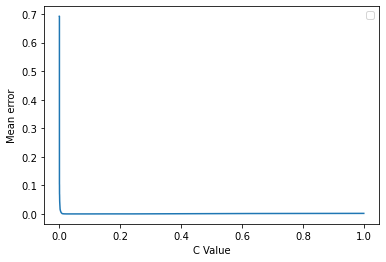

In [15]:
scores = fin_gs.cv_results_['mean_test_score']
plt.plot(c_values, 1-scores)
plt.legend()
plt.xlabel('C Value')
plt.ylabel('Mean error')
plt.show()

In [16]:
print("Best score: %0.3f" % fin_gs.best_score_)
print("Best parameters set:")
best_parameters = fin_gs.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 1.000
Best parameters set:
	C: 0.023299518105153717


At 99.2% accuracy, these clusters appear to fit the data well and should offer informative labels for classification. Additionally, we may be able to transform these labels further for different types of classification.

These clusters may represent families or genus of a mushroom or perhaps even more evolutionary kind of groupings (in the sense that 'edibility' is very human evolution bound and often connected to familiarity/necessity).  As the visualization shows, there are clusters entirely devoid of poisonous mushrooms which may be great labels to substitute for the observed poisonous/edible because the 'edible' mushrooms are confirmed, whereas the subset of mushrooms labeled 'poisonous' also includes mushrooms that are unconfirmed.